# Machine Learning Classification model Using XGBoost Classifier

This is a Machine Learning (ML) project where we want to predict whether a person experienced 90 days past due deliquency or worse. Delinquency is the state of being past due on a debt (when you're behind on your installment payments). Once you're deliquent for a certain period of time, your lender will declare the loan to be in default. The data set used was found on Kaggle and it has 12 columns as input variables and 150000 rows. Our dataset is a classification problem with YES/NO as our predicting variables. For this project we will explore XGBoost Classifier as our Machine Learning algorithm. Since our predicting variable is class imbalanced, we will further explore techniques that deal with imbalanced classes in Machine Learning. These will include Random Undersampling Technique, Random Oversampling technique (ROSE) and Synthetic Minority Oversampling Technique (SMOTE). Technique with the best metric scoring will be used in the final model for prediction where we will then implement Hyper parameter tuning with GridSearchCV to choose the best parameters for the final model.

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [167]:
# enlarge graphs and plots
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [168]:
#import the datasets
data = pd.read_csv("cs-training.csv")
test = pd.read_csv("cs-test.csv")

# 1. Data Analysis

In [137]:
#check top five rows of our dataset
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [138]:
# check the information of the whole dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

The info() method gives basic information about our dataset i.e number of columns (12) and rows (150 000) as well as the datatypes (int64 & float64). 

In [78]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


The describe() method gives a statistical summary of the numeric variables of our dataset i.e the minimum and maximum values of each variables, mean and standard deviation of variables as well as the quartile and percentile ranges. The mimimum value for our age variable is 0 (zero), The variable therefore has to be removed from our dataset since age cannot be zero.

In [79]:
#check missing values
data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Text(0.5, 1.0, 'Visual representation of Missing Variables')

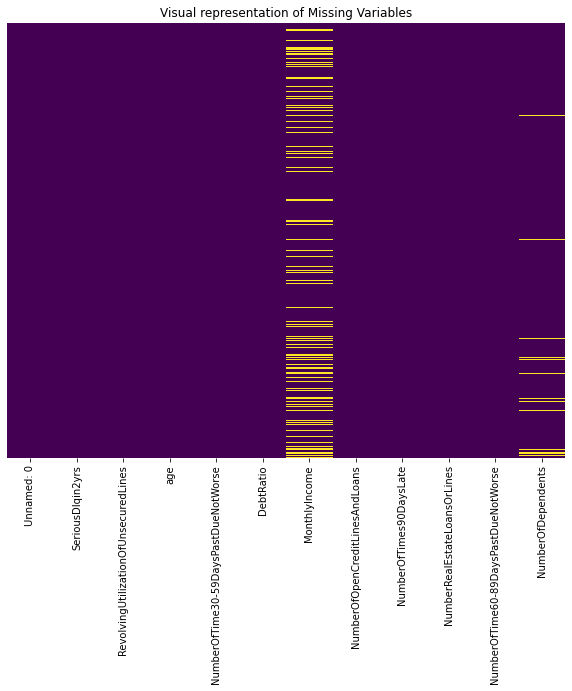

In [139]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis').set_title('Visual representation of Missing Variables')

There are two variables that have missing values, Monthly Income and Number of Dependents. The rest of the variables do not have any missing variables.The graph shows the visualisation of those missing values.Monthly Income has significantly more missing values. We will then check the percentage of missing variables from our whole dataset and decide on the data imputation technique based on the percentage of missing variables.

In [81]:
#getting % of missing values
x = data['MonthlyIncome'].isnull().sum()/data['MonthlyIncome'].count() * 100
print(f'Percentage of missing values on Monthly Income = {round(x,2)}%')

y = data['NumberOfDependents'].isnull().sum()/data['NumberOfDependents'].count() * 100
print(f'Percentage of missing values on Number of dependants = {round(y,2)}%')

Percentage of missing values on Monthly Income = 24.72%
Percentage of missing values on Number of dependants = 2.69%


Monthly Income has 24.72% of missing data whereas the Number of Dependents columns only has 2.69% of missing data. From the description of our data we note that the **Debt Ratio variable** which is calculated as (debt payments, living costs) / Gross Monthly Income is highly interdependent on the Monthly Income variable. For this project, we are going to drop all columns that have Null values on Monthy Income variable. As for Number of Dependents, we are going to impute the missing values with the mode value (most frequent value).

In [140]:
# getting count of Monthly income of zero or one or less than 50
x = data[data['MonthlyIncome'] == 0]['MonthlyIncome'].count()
y = data[data['MonthlyIncome'] == 1]['MonthlyIncome'].count()
z = data[data['MonthlyIncome'] <= 50]['MonthlyIncome'].count()
perc = data[data['MonthlyIncome'] <= 50]['MonthlyIncome'].count()/data['MonthlyIncome'].count() * 100

In [141]:
print(f"Monthly Income == 0 : {x}")
print(f"Monthly Income == 1 : {y}")
print(f"Monthly Income less than 50 : {z}")
print(f"Percentage of Monthly Income less than 50 : {round(perc,2)}%")

Monthly Income == 0 : 1634
Monthly Income == 1 : 605
Monthly Income less than 50 : 2268
Percentage of Monthly Income less than 50 : 1.89%


The Monthly Income variable also has 1,634 and 605 borrowers that have a monthly income of 0 and 1 respectively. We assume that where Monthly income is 0 or 1, it represent that individual has No Income. 

# 2. Data Preprocessing

# i) Dealing with missing values for train data

For this particular ML project, we are going to start with data preprocessing before data exploration. We do this to handle missing columns that have interconnection with other data variables. This will help to better analyse our data variables and make conclusive analyses.

In [169]:
# delete 1st column generated when loading the csv file.
data.drop('Unnamed: 0', axis=1, inplace=True)

In [170]:
# get the most frequent value for Number of dependents
mode = data['NumberOfDependents'].mode()
data['NumberOfDependents'].fillna(mode, inplace=True)

In [171]:
# drop all rows with NA ~ Monthly Income
data.dropna(inplace=True)

In [173]:
# drop rows/ variables where Age is zero
data.drop(data[data['age'] == 0].index, inplace=True)
#data.drop(data[data['age'] == 0], axis=1, inplace=True)

In [176]:
#drop all columns where monthly income is less than 50
data.drop(data[data['MonthlyIncome'] <=50].index,inplace=True)

In [177]:
# get all the columns of our data
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [178]:
data['MonthlyIncome'].count()

118000

Replacing Number of dependants column with the most frequent value for both train data. The most frequent value for Number of dependants is 0.

We are going to drop all columns that have missing values for Monthly Income.
Finally, we drop column where Age variable is zero

Text(0.5, 1.0, 'heatmap - Missing Values')

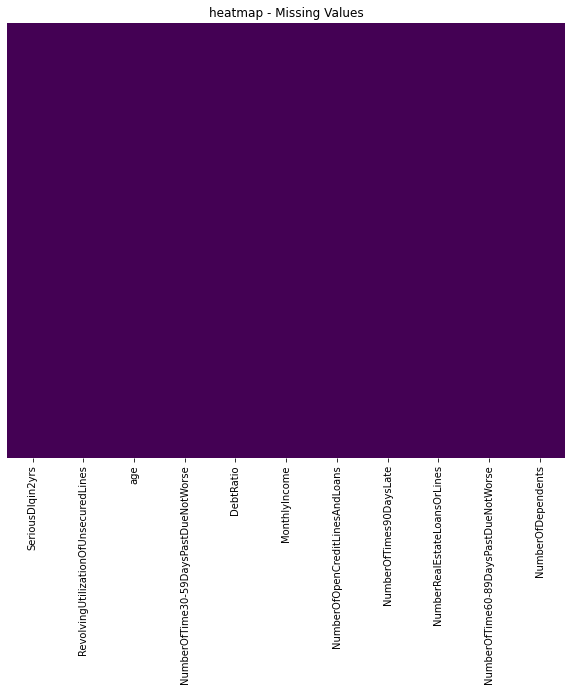

In [88]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis').set_title("heatmap - Missing Values")

As we can see from our visualisation that our dataset is now clean and free from missing values. Since we have already preprocessed our dataset, it nolonger has missing values. Our dataset also reduced in size from 150,000 to 118000 after removing Null/NA values from the monthly Income variable and where Age is zero.

# ii) Dealing with Missing Values for Test dataset

<AxesSubplot:>

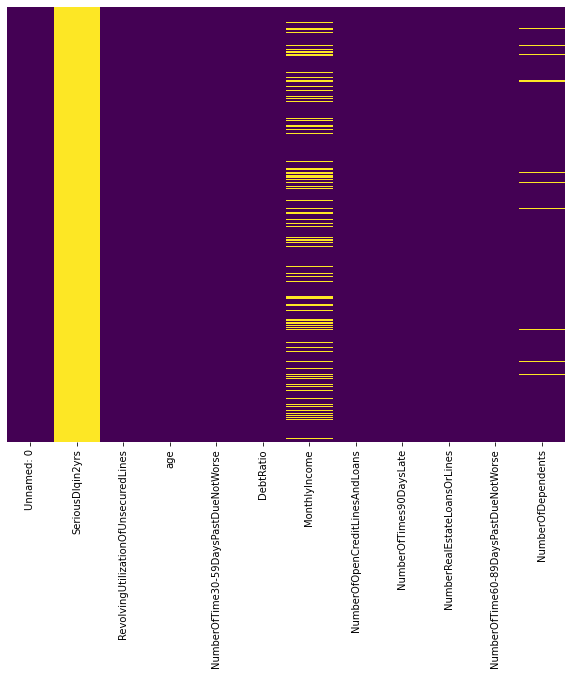

In [89]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [90]:
# Drop the unnamed variable and independent variable for prediction.
test.drop('Unnamed: 0', axis=1, inplace=True)
#test data drop dependent variable
test_data = test.drop(columns='SeriousDlqin2yrs', axis=1)

In [91]:
# replace missing variables for Number of Dependents
mode = test_data['NumberOfDependents'].mode()
test_data['NumberOfDependents'].fillna(0, inplace=True)
print(f"Frequent Number of dependents: {mode}")

Frequent Number of dependents: 0    0.0
dtype: float64


In [92]:
# replace missing variables for Monthly Income with most frequent value
mode_income = test_data['MonthlyIncome'].mode()
test_data['MonthlyIncome'].fillna(5000, inplace=True)
print(f"Frequent Monthly Income: {mode_income}")


Frequent Monthly Income: 0    5000.0
dtype: float64


For our test dataset, we also have two variables that have missing values. For the Number of dependents, we replace misssing values with a mode of zero that was used in our train dataset. Since we do not want to loose our dataset, we will further replace Monthly Income variable with with the most frequent value (mode). 

In [21]:
#sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# 3. Data Exploration

## Simple Plots For Data Exploration

In [22]:
#get names of the columns
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Text(0.5, 1.0, 'Serious Delinquency in 2 years')

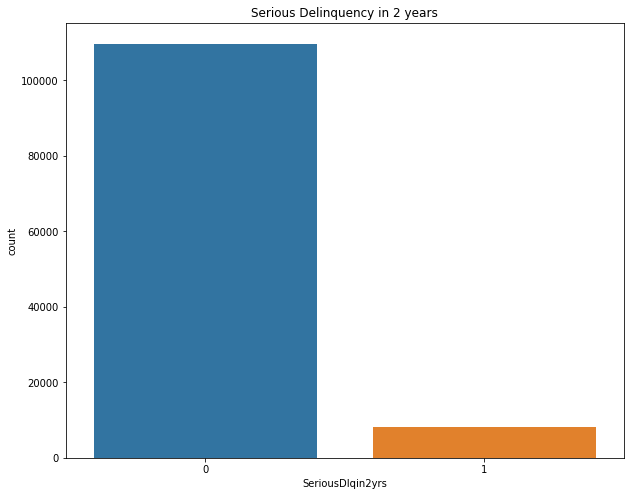

In [404]:
sns.countplot(data=data, x='SeriousDlqin2yrs').set_title('Serious Delinquency in 2 years')

The graph shows the count of dependant variable we want to predict. We can note that our dataset is class imbalanced and therefore we need to consider using techniques that handle class imbalance when building our Machine Learning models so that we get unbiased predictions.

Text(0.5, 1.0, 'Kdeplot ~ Age')

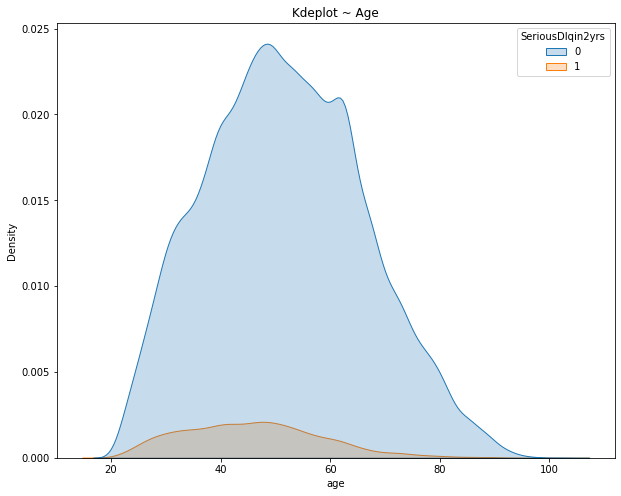

In [405]:
sns.kdeplot(data['age'], shade=True, hue=data['SeriousDlqin2yrs']).set_title('Kdeplot ~ Age')

Density plot for the age variable using Seaborn kdeplot. The plot shows the distribution of variable age for both classes, and the distribution follows a normally distributed curve. 

Text(0.5, 1.0, 'Delinquency 30-59 days')

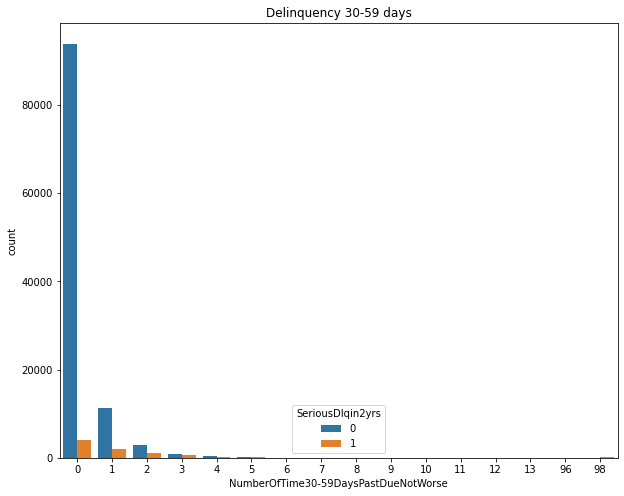

In [406]:
sns.countplot(data=data, x='NumberOfTime30-59DaysPastDueNotWorse', hue=data['SeriousDlqin2yrs']).set_title('Delinquency 30-59 days')

In [397]:
p = data[data['NumberOfTime30-59DaysPastDueNotWorse'] == 0]['NumberOfTime30-59DaysPastDueNotWorse'].count()
x = data[data['NumberOfTime30-59DaysPastDueNotWorse'] > 0]['NumberOfTime30-59DaysPastDueNotWorse'].count()
y = data[data['NumberOfTime30-59DaysPastDueNotWorse'] > 4]['NumberOfTime30-59DaysPastDueNotWorse'].count()
z = data[data['NumberOfTime30-59DaysPastDueNotWorse'] == 98]['NumberOfTime30-59DaysPastDueNotWorse'].count()

In [398]:
print(f"Borrowers NOT due : {p}")
print(f"Borrowers due one time or more : {x}")
print(f"Borrowers due more than four times : {y}")
print(f"Borrowers due 98 times {z}")

Borrowers NOT due : 97970
Borrowers due one time or more : 20030
Borrowers due more than four times : 631
Borrowers due 98 times 135


The countplot shows the distribution of the **number of times borrower has been 30-59 days but not worse in the last 2 years**. Most borrowers have not been due 30-59 days. Only 20,030 borrowers have been due more than once and 631 borrowers have been due more than 4 times with 135 due 98 times.

Text(0.5, 1.0, 'Delinquency 60-89 days')

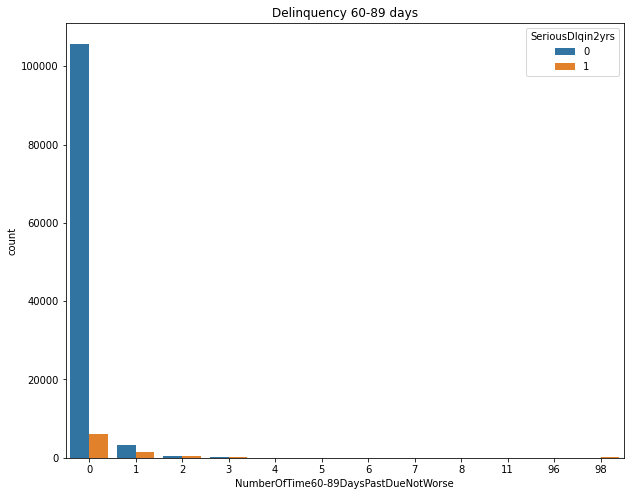

In [407]:
sns.countplot(data=data, x='NumberOfTime60-89DaysPastDueNotWorse', hue=data['SeriousDlqin2yrs']).set_title('Delinquency 60-89 days')

In [399]:
p = data[data['NumberOfTime30-59DaysPastDueNotWorse'] == 0]['NumberOfTime30-59DaysPastDueNotWorse'].count()
x = data[data['NumberOfTime30-59DaysPastDueNotWorse'] > 0]['NumberOfTime30-59DaysPastDueNotWorse'].count()
y = data[data['NumberOfTime30-59DaysPastDueNotWorse'] > 4]['NumberOfTime30-59DaysPastDueNotWorse'].count()
z = data[data['NumberOfTime30-59DaysPastDueNotWorse'] == 98]['NumberOfTime30-59DaysPastDueNotWorse'].count()

In [400]:
print(f"Borrowers NOT due : {p}")
print(f"Borrowers due one time or more : {x}")
print(f"Borrowers due more than four times : {y}")
print(f"Borrowers due 98 times {z}")

Borrowers NOT due : 97970
Borrowers due one time or more : 20030
Borrowers due more than four times : 631
Borrowers due 98 times 135


The countplot shows the distribution of the **number of times borrower has been 60-89 days but not worse in the last 2 years**. Most borrowers have not been due between 60-89 days. 20,030 borrowers have been due more than once while 631 borrowers have been due more than four times with 135 due exacle 98 days or more.

Text(0.5, 1.0, 'Delinquency 90 days and more')

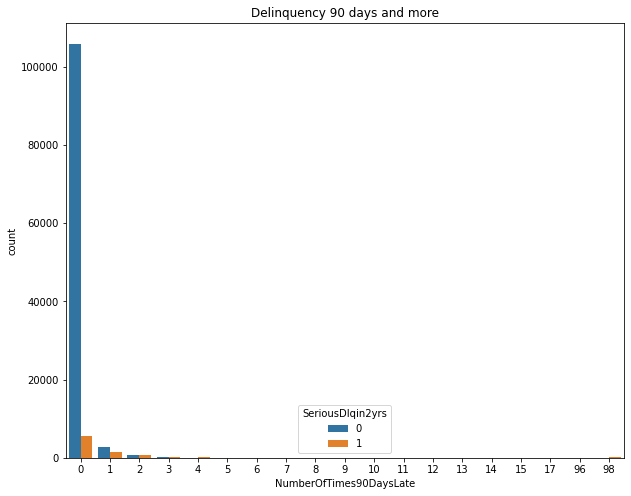

In [408]:
sns.countplot(data=data, x='NumberOfTimes90DaysLate', hue=data['SeriousDlqin2yrs']).set_title('Delinquency 90 days and more')

In [409]:
p = data[data['NumberOfTimes90DaysLate'] == 0]['NumberOfTimes90DaysLate'].count()
x = data[data['NumberOfTimes90DaysLate'] > 0]['NumberOfTimes90DaysLate'].count()
y = data[data['NumberOfTimes90DaysLate'] > 1]['NumberOfTimes90DaysLate'].count()
z = data[data['NumberOfTimes90DaysLate'] == 98]['NumberOfTimes90DaysLate'].count()

In [410]:
print(f"Borrowers NOT due : {p}")
print(f"Borrowers due one time or more : {x}")
print(f"Borrowers due two times or more : {y}")
print(f"Borrowers due 98 times {z}")

Borrowers NOT due : 111360
Borrowers due one time or more : 6640
Borrowers due two times or more : 2381
Borrowers due 98 times 135


The countplot shows the distribution of the **number of times borrower has been 90 days but not worse in the last 2 years**. Most  borrowers have not been due 90 days or more. 6,640 borrowers have been due atleast once while 2,381 borrowers have been due more than one time with 135 due exacle 98 times or more.

In [618]:
# sns.histplot(data=data, x='MonthlyIncome')

Text(0.5, 1.0, 'Number of Dependents')

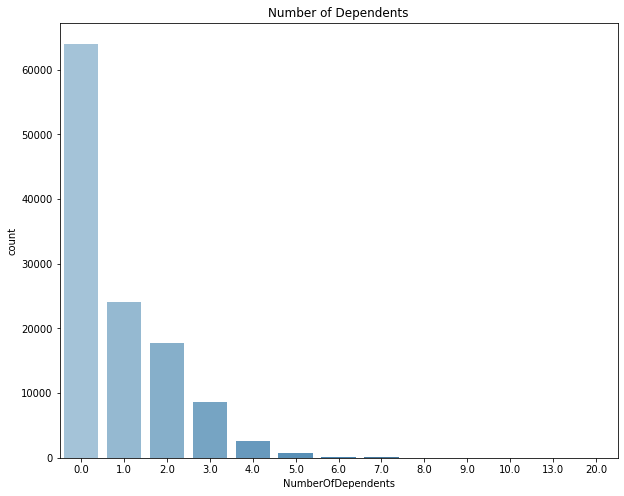

In [411]:
# number of dependents
sns.countplot(data=data, x='NumberOfDependents',palette="Blues_d").set_title('Number of Dependents')

In [ ]:
#data[data['NumberOfDependents'] >6]['NumberOfDependents'].count()

The graph shows the distribution of the Number of Dependants in family (spouse, children etc). 64,026 borrowers do not have any dependants, followed by 24,136 borrowers who only have one dependent. 3,512 borrowers have four or more dependents with only 80 having more than 6 dependents.

Text(0.5, 1.0, 'Number Of Open Credit Lines And Loans')

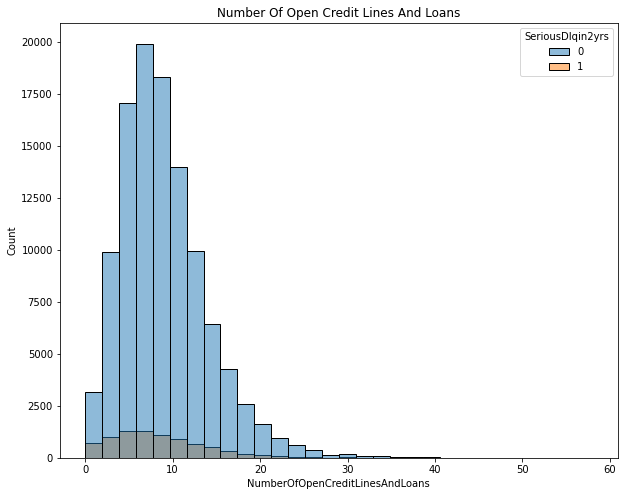

In [417]:
sns.histplot(data=data, x='NumberOfOpenCreditLinesAndLoans', hue='SeriousDlqin2yrs', bins=30).set_title('Number Of Open Credit Lines And Loans')

The number of open credit lines and loans follows a normal distribution with a mean of around 8

In [418]:
# getting the column for credit utilisation for simple plotting 
x = round(data['RevolvingUtilizationOfUnsecuredLines']*100)

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


107660 have a utilization ratio less than  100%
7835 have a utilization ratio equal to 100%


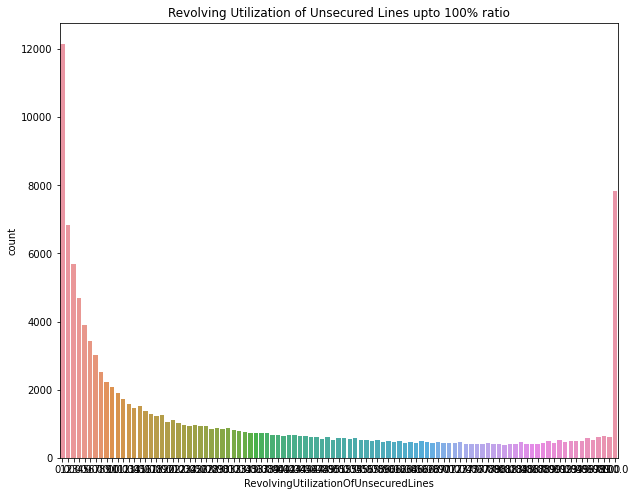

In [419]:
# plot for utilization ratio less than 100%
sns.countplot(x[x<=100]).set_title('Revolving Utilization of Unsecured Lines upto 100% ratio')
print(x[x<100].count(), 'have a utilization ratio less than  100%')
print(x[x==100].count(), 'have a utilization ratio equal to 100%')

**RevolvingUtilizationOfUnsecuredLines** is a variable that describes the ratio of the total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits. This is the ratio that shows how much the borrower utilizes their credit limits. A low credit utilization rate shows you're using less of your available credit which is an indication you're doing a good job managing credit. The graph shows distribution of **RevolvingUtilizationOfUnsecuredLines** between 0 and 100 %. 

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2505 have a utilization ratio greater than 100%
5070800.0  is the maximum ratio of utilization expressed as a %


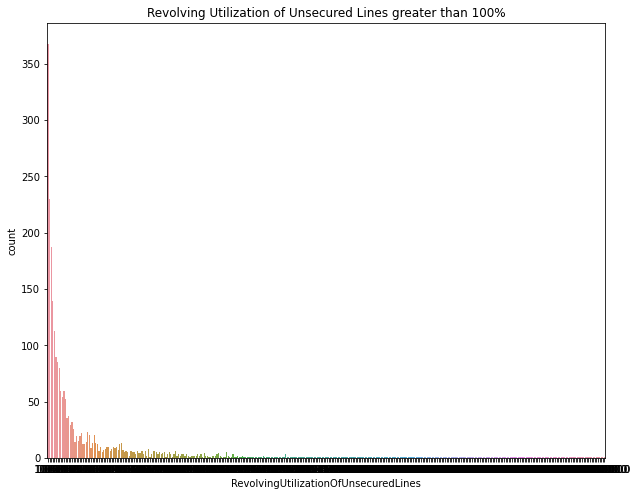

In [420]:
# plot for utilization ratio greater 100%
sns.countplot(x[x>100]).set_title('Revolving Utilization of Unsecured Lines greater than 100%')
print(x[x>100].count(), 'have a utilization ratio greater than 100%')
print(x.max(),' is the maximum ratio of utilization expressed as a %')

The graph shows distribution of **RevolvingUtilizationOfUnsecuredLines** between 100 and 5070800 being the maximum value. This counts a total of 2505 of our dataset. A ratio greater than 100% may show that the borrower over utilizes their credit limits and borrower may be perceived as a risky borrower from the perspective of lenders.The distribution is also right skewed.

Text(0.5, 1.0, 'Correlation of variables')

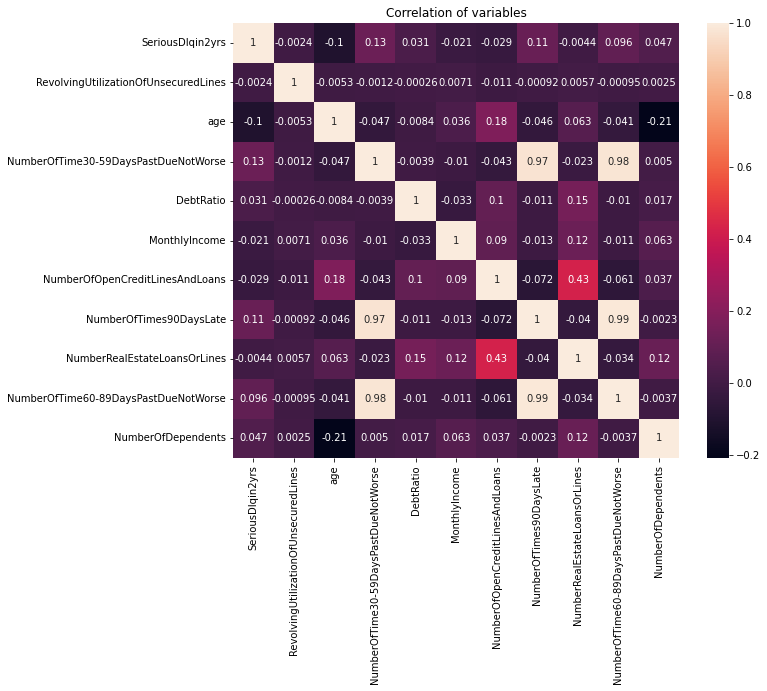

In [421]:
sns.heatmap(data.corr(), annot=True).set_title('Correlation of variables')

The heatmap above shows the correlation of variables. Most variables are not correlated except for Number of Times overdue for 30-59, 60-89 and +90 days, which are strongly correlated at 97% and above

# 4. Building Machine Learning Model - XGBoost Classifier

# Techniques to deal with Imbalanced Classes

Our dataset dependant variable is class imbalance. Predicting the dependant variable with imbalanced dataset will get high accuracy for the majority class but, however, fail to capture the minority class (Delinquency) which is most often a critical prediction we want to capture. To improve the accuracy of our algorithm, we need to apply techniques to deal with imbalanved dataset such as Resampling techniques (Undersampling), Random Oversampling Technique (ROSE), Synthetic Minority Oversampling Techniques (SMOTE). For the purposes of this project, we will only use SMOTE as our resampling technque.

In [625]:
#pip install -U imbalanced-learn

In [422]:
# seperate data into x and y
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

Text(0.5, 1.0, 'Pie Chart ~ Imbalanced data')

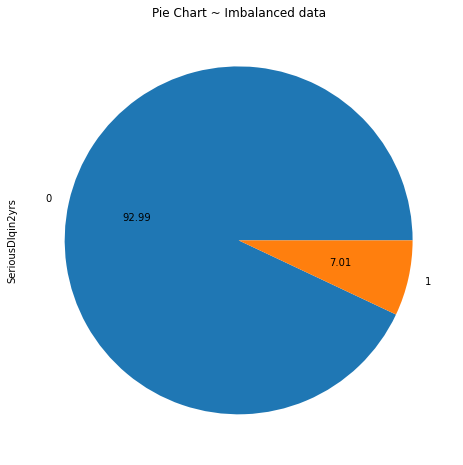

In [423]:
y.value_counts().plot.pie(autopct='%.2f')
plt.title('Pie Chart ~ Imbalanced data')

In [424]:
y.value_counts()

0    109727
1      8273
Name: SeriousDlqin2yrs, dtype: int64

# i. Random Undersampling Technique

This method randomly select and remove samples from the majority class, consequently reducing the number of samples in the majority class.

In [425]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=101)
X_rus, y_rus = rus.fit_resample(X, y)

Text(0.5, 1.0, 'Pie Chart ~ Undersampling')

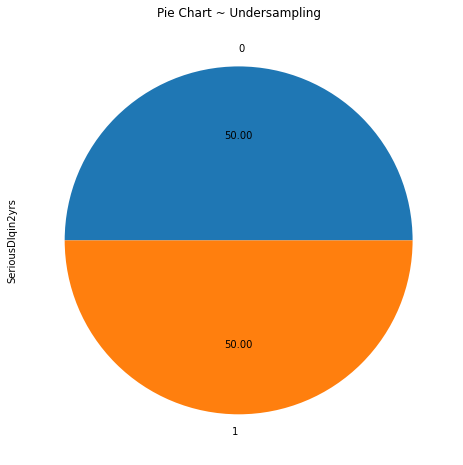

In [426]:
y_rus.value_counts().plot.pie(autopct='%.2f')
plt.title('Pie Chart ~ Undersampling')

In [427]:
y_rus.value_counts()

0    8273
1    8273
Name: SeriousDlqin2yrs, dtype: int64

# ii. ROSE ~ Random Oversampling Technique

This is the opposite of Undersampling whereby random samples from the minority class with dublicated to suppliment the minority class.

In [428]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=101)
X_ros, y_ros = ros.fit_resample(X,y)

Text(0.5, 1.0, 'Pie Chart ~ OverSampling')

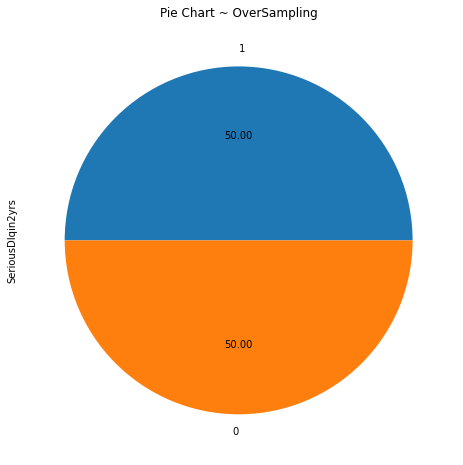

In [429]:
y_ros.value_counts().plot.pie(autopct='%.2f')
plt.title('Pie Chart ~ OverSampling')

In [430]:
y_ros.value_counts()

1    109727
0    109727
Name: SeriousDlqin2yrs, dtype: int64

# iii. SMOTE ~ Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling

In [431]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_resample(X,y)

Text(0.5, 1.0, 'Pie Chart ~ SMOTE')

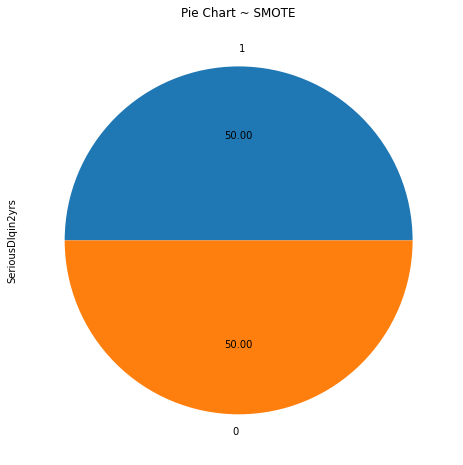

In [432]:
y_sm.value_counts().plot.pie(autopct='%.2f')
plt.title('Pie Chart ~ SMOTE')

In [433]:
y_sm.value_counts()

1    109727
0    109727
Name: SeriousDlqin2yrs, dtype: int64

## XGBoost Hyper parameters

In [434]:
# getting hyper parameters for the model
import xgboost
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

The get_params() method provides a list of all the parameters that can be used in the model

# 4.1. XGBoost using Random Undersampling Technique

In [435]:
import xgboost
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [433]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=101)

## Train the XGBoost Model 

In [434]:
rus_xgboost = xgboost.XGBClassifier(learning_rate=0.1, #specifies how quickly the model fits the residual errors 
                                    max_depth=5, #how deep the tree's decision nodes can go
                                    n_estimators=5000, # max number of trees the model can create
                                    subsample=0.5, #fraction of the train set that can be used to train each tree
                                    colsample_bytree=0.5, #fraction of the features that can be used to train each tree
                                    eval_metric='auc', #evaluation metric used
                                    verbosity=1)

eval_set = [(X_test, y_test)]

#
rus_xgboost.fit(X_train, 
                 y_train,
                early_stopping_rounds=10, #no new tree will be build if model perfomance does not change for 10 iterations
                eval_set=eval_set,
                verbose=True)

[0]	validation_0-auc:0.77947


C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.83922
[2]	validation_0-auc:0.83536
[3]	validation_0-auc:0.83656
[4]	validation_0-auc:0.84506
[5]	validation_0-auc:0.84643
[6]	validation_0-auc:0.84714
[7]	validation_0-auc:0.84751
[8]	validation_0-auc:0.84802
[9]	validation_0-auc:0.84823
[10]	validation_0-auc:0.84839
[11]	validation_0-auc:0.84855
[12]	validation_0-auc:0.84854
[13]	validation_0-auc:0.84842
[14]	validation_0-auc:0.84827
[15]	validation_0-auc:0.84830
[16]	validation_0-auc:0.84859
[17]	validation_0-auc:0.84916
[18]	validation_0-auc:0.84928
[19]	validation_0-auc:0.84930
[20]	validation_0-auc:0.84956
[21]	validation_0-auc:0.84955
[22]	validation_0-auc:0.84977
[23]	validation_0-auc:0.84986
[24]	validation_0-auc:0.84994
[25]	validation_0-auc:0.85001
[26]	validation_0-auc:0.84972
[27]	validation_0-auc:0.85004
[28]	validation_0-auc:0.84993
[29]	validation_0-auc:0.84979
[30]	validation_0-auc:0.84967
[31]	validation_0-auc:0.84980
[32]	validation_0-auc:0.85008
[33]	validation_0-auc:0.84998
[34]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Make Predictions with XGBoost Model

In [435]:
rus_predictions = rus_xgboost.predict_proba(X_test)

In [436]:
rus_predictions11 = rus_xgboost.predict(X_test)

In [437]:
rus_predictions11

array([1, 1, 0, ..., 0, 0, 1])

In [438]:
rus_predictions

array([[0.36028212, 0.6397179 ],
       [0.04257262, 0.9574274 ],
       [0.5532763 , 0.4467237 ],
       ...,
       [0.89280885, 0.10719113],
       [0.8674255 , 0.13257451],
       [0.4321044 , 0.5678956 ]], dtype=float32)

In [439]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [444]:
rus_acc = accuracy_score(y_test,rus_predictions11)

In [445]:
rus_acc

0.7748753738783649

In [446]:
rus_roc_acc = roc_auc_score(y_test,rus_predictions11)

In [447]:
rus_roc_acc

0.7749011936286789

# 4.2. XGBoost Classifier using ROSE

eXtreme Gradient Boosting  is one of the most widely used machine learning algorthims.

In [24]:
import xgboost
from sklearn.metrics import roc_auc_score

In [25]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=101)

The training set will be used to prepare the XGBoost model and the test set will be used to make new predictions, from which we can evaluate the performance of the model.

## Train the XGBoost Model

In [450]:
rose_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                    max_depth=5,
                                    n_estimators=5000,
                                    subsample=0.5,
                                    colsample_bytree=0.5,
                                    eval_metric='auc',
                                    verbosity=1)

eval_set = [(X_test, y_test)]

rose_xgboost.fit(X_train, 
                 y_train,
                early_stopping_rounds=10,
                eval_set=eval_set,
                verbose=True)

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79626
[1]	validation_0-auc:0.84110
[2]	validation_0-auc:0.84775
[3]	validation_0-auc:0.84412
[4]	validation_0-auc:0.85034
[5]	validation_0-auc:0.85260
[6]	validation_0-auc:0.85254
[7]	validation_0-auc:0.85498
[8]	validation_0-auc:0.85497
[9]	validation_0-auc:0.85498
[10]	validation_0-auc:0.85581
[11]	validation_0-auc:0.85609
[12]	validation_0-auc:0.85706
[13]	validation_0-auc:0.85731
[14]	validation_0-auc:0.85776
[15]	validation_0-auc:0.85819
[16]	validation_0-auc:0.85840
[17]	validation_0-auc:0.85901
[18]	validation_0-auc:0.85902
[19]	validation_0-auc:0.85909
[20]	validation_0-auc:0.85905
[21]	validation_0-auc:0.85898
[22]	validation_0-auc:0.85956
[23]	validation_0-auc:0.85971
[24]	validation_0-auc:0.86025
[25]	validation_0-auc:0.86052
[26]	validation_0-auc:0.86079
[27]	validation_0-auc:0.86102
[28]	validation_0-auc:0.86118
[29]	validation_0-auc:0.86133
[30]	validation_0-auc:0.86158
[31]	validation_0-auc:0.86193
[32]	validation_0-auc:0.86213
[33]	validation_0-au

[268]	validation_0-auc:0.89085
[269]	validation_0-auc:0.89091
[270]	validation_0-auc:0.89102
[271]	validation_0-auc:0.89110
[272]	validation_0-auc:0.89116
[273]	validation_0-auc:0.89131
[274]	validation_0-auc:0.89146
[275]	validation_0-auc:0.89161
[276]	validation_0-auc:0.89164
[277]	validation_0-auc:0.89169
[278]	validation_0-auc:0.89187
[279]	validation_0-auc:0.89204
[280]	validation_0-auc:0.89218
[281]	validation_0-auc:0.89235
[282]	validation_0-auc:0.89237
[283]	validation_0-auc:0.89242
[284]	validation_0-auc:0.89255
[285]	validation_0-auc:0.89269
[286]	validation_0-auc:0.89271
[287]	validation_0-auc:0.89279
[288]	validation_0-auc:0.89288
[289]	validation_0-auc:0.89297
[290]	validation_0-auc:0.89302
[291]	validation_0-auc:0.89311
[292]	validation_0-auc:0.89315
[293]	validation_0-auc:0.89326
[294]	validation_0-auc:0.89336
[295]	validation_0-auc:0.89342
[296]	validation_0-auc:0.89358
[297]	validation_0-auc:0.89387
[298]	validation_0-auc:0.89389
[299]	validation_0-auc:0.89391
[300]	va

[533]	validation_0-auc:0.91098
[534]	validation_0-auc:0.91108
[535]	validation_0-auc:0.91113
[536]	validation_0-auc:0.91119
[537]	validation_0-auc:0.91123
[538]	validation_0-auc:0.91132
[539]	validation_0-auc:0.91138
[540]	validation_0-auc:0.91149
[541]	validation_0-auc:0.91154
[542]	validation_0-auc:0.91164
[543]	validation_0-auc:0.91172
[544]	validation_0-auc:0.91180
[545]	validation_0-auc:0.91198
[546]	validation_0-auc:0.91200
[547]	validation_0-auc:0.91207
[548]	validation_0-auc:0.91214
[549]	validation_0-auc:0.91226
[550]	validation_0-auc:0.91233
[551]	validation_0-auc:0.91239
[552]	validation_0-auc:0.91253
[553]	validation_0-auc:0.91255
[554]	validation_0-auc:0.91266
[555]	validation_0-auc:0.91269
[556]	validation_0-auc:0.91281
[557]	validation_0-auc:0.91293
[558]	validation_0-auc:0.91298
[559]	validation_0-auc:0.91304
[560]	validation_0-auc:0.91310
[561]	validation_0-auc:0.91312
[562]	validation_0-auc:0.91316
[563]	validation_0-auc:0.91327
[564]	validation_0-auc:0.91329
[565]	va

[798]	validation_0-auc:0.92533
[799]	validation_0-auc:0.92534
[800]	validation_0-auc:0.92538
[801]	validation_0-auc:0.92542
[802]	validation_0-auc:0.92550
[803]	validation_0-auc:0.92558
[804]	validation_0-auc:0.92562
[805]	validation_0-auc:0.92563
[806]	validation_0-auc:0.92567
[807]	validation_0-auc:0.92574
[808]	validation_0-auc:0.92579
[809]	validation_0-auc:0.92587
[810]	validation_0-auc:0.92589
[811]	validation_0-auc:0.92593
[812]	validation_0-auc:0.92596
[813]	validation_0-auc:0.92599
[814]	validation_0-auc:0.92606
[815]	validation_0-auc:0.92612
[816]	validation_0-auc:0.92621
[817]	validation_0-auc:0.92627
[818]	validation_0-auc:0.92629
[819]	validation_0-auc:0.92632
[820]	validation_0-auc:0.92637
[821]	validation_0-auc:0.92640
[822]	validation_0-auc:0.92652
[823]	validation_0-auc:0.92653
[824]	validation_0-auc:0.92658
[825]	validation_0-auc:0.92661
[826]	validation_0-auc:0.92663
[827]	validation_0-auc:0.92668
[828]	validation_0-auc:0.92673
[829]	validation_0-auc:0.92675
[830]	va

[1061]	validation_0-auc:0.93630
[1062]	validation_0-auc:0.93633
[1063]	validation_0-auc:0.93634
[1064]	validation_0-auc:0.93636
[1065]	validation_0-auc:0.93637
[1066]	validation_0-auc:0.93640
[1067]	validation_0-auc:0.93646
[1068]	validation_0-auc:0.93646
[1069]	validation_0-auc:0.93647
[1070]	validation_0-auc:0.93648
[1071]	validation_0-auc:0.93656
[1072]	validation_0-auc:0.93658
[1073]	validation_0-auc:0.93663
[1074]	validation_0-auc:0.93669
[1075]	validation_0-auc:0.93671
[1076]	validation_0-auc:0.93672
[1077]	validation_0-auc:0.93674
[1078]	validation_0-auc:0.93677
[1079]	validation_0-auc:0.93685
[1080]	validation_0-auc:0.93685
[1081]	validation_0-auc:0.93697
[1082]	validation_0-auc:0.93703
[1083]	validation_0-auc:0.93704
[1084]	validation_0-auc:0.93707
[1085]	validation_0-auc:0.93708
[1086]	validation_0-auc:0.93710
[1087]	validation_0-auc:0.93713
[1088]	validation_0-auc:0.93716
[1089]	validation_0-auc:0.93720
[1090]	validation_0-auc:0.93725
[1091]	validation_0-auc:0.93731
[1092]	v

[1318]	validation_0-auc:0.94452
[1319]	validation_0-auc:0.94453
[1320]	validation_0-auc:0.94454
[1321]	validation_0-auc:0.94455
[1322]	validation_0-auc:0.94458
[1323]	validation_0-auc:0.94461
[1324]	validation_0-auc:0.94465
[1325]	validation_0-auc:0.94468
[1326]	validation_0-auc:0.94471
[1327]	validation_0-auc:0.94473
[1328]	validation_0-auc:0.94474
[1329]	validation_0-auc:0.94474
[1330]	validation_0-auc:0.94479
[1331]	validation_0-auc:0.94483
[1332]	validation_0-auc:0.94487
[1333]	validation_0-auc:0.94488
[1334]	validation_0-auc:0.94489
[1335]	validation_0-auc:0.94492
[1336]	validation_0-auc:0.94497
[1337]	validation_0-auc:0.94497
[1338]	validation_0-auc:0.94499
[1339]	validation_0-auc:0.94500
[1340]	validation_0-auc:0.94502
[1341]	validation_0-auc:0.94507
[1342]	validation_0-auc:0.94512
[1343]	validation_0-auc:0.94514
[1344]	validation_0-auc:0.94518
[1345]	validation_0-auc:0.94522
[1346]	validation_0-auc:0.94528
[1347]	validation_0-auc:0.94526
[1348]	validation_0-auc:0.94530
[1349]	v

[1575]	validation_0-auc:0.95062
[1576]	validation_0-auc:0.95064
[1577]	validation_0-auc:0.95067
[1578]	validation_0-auc:0.95070
[1579]	validation_0-auc:0.95070
[1580]	validation_0-auc:0.95072
[1581]	validation_0-auc:0.95075
[1582]	validation_0-auc:0.95079
[1583]	validation_0-auc:0.95081
[1584]	validation_0-auc:0.95080
[1585]	validation_0-auc:0.95079
[1586]	validation_0-auc:0.95081
[1587]	validation_0-auc:0.95082
[1588]	validation_0-auc:0.95082
[1589]	validation_0-auc:0.95083
[1590]	validation_0-auc:0.95083
[1591]	validation_0-auc:0.95086
[1592]	validation_0-auc:0.95087
[1593]	validation_0-auc:0.95088
[1594]	validation_0-auc:0.95093
[1595]	validation_0-auc:0.95095
[1596]	validation_0-auc:0.95096
[1597]	validation_0-auc:0.95098
[1598]	validation_0-auc:0.95098
[1599]	validation_0-auc:0.95100
[1600]	validation_0-auc:0.95102
[1601]	validation_0-auc:0.95104
[1602]	validation_0-auc:0.95108
[1603]	validation_0-auc:0.95111
[1604]	validation_0-auc:0.95111
[1605]	validation_0-auc:0.95114
[1606]	v

[1832]	validation_0-auc:0.95589
[1833]	validation_0-auc:0.95592
[1834]	validation_0-auc:0.95596
[1835]	validation_0-auc:0.95597
[1836]	validation_0-auc:0.95601
[1837]	validation_0-auc:0.95601
[1838]	validation_0-auc:0.95605
[1839]	validation_0-auc:0.95608
[1840]	validation_0-auc:0.95610
[1841]	validation_0-auc:0.95610
[1842]	validation_0-auc:0.95610
[1843]	validation_0-auc:0.95614
[1844]	validation_0-auc:0.95616
[1845]	validation_0-auc:0.95620
[1846]	validation_0-auc:0.95621
[1847]	validation_0-auc:0.95627
[1848]	validation_0-auc:0.95628
[1849]	validation_0-auc:0.95630
[1850]	validation_0-auc:0.95631
[1851]	validation_0-auc:0.95632
[1852]	validation_0-auc:0.95632
[1853]	validation_0-auc:0.95635
[1854]	validation_0-auc:0.95637
[1855]	validation_0-auc:0.95639
[1856]	validation_0-auc:0.95642
[1857]	validation_0-auc:0.95642
[1858]	validation_0-auc:0.95646
[1859]	validation_0-auc:0.95649
[1860]	validation_0-auc:0.95649
[1861]	validation_0-auc:0.95649
[1862]	validation_0-auc:0.95652
[1863]	v

[2089]	validation_0-auc:0.96076
[2090]	validation_0-auc:0.96081
[2091]	validation_0-auc:0.96079
[2092]	validation_0-auc:0.96082
[2093]	validation_0-auc:0.96084
[2094]	validation_0-auc:0.96086
[2095]	validation_0-auc:0.96086
[2096]	validation_0-auc:0.96089
[2097]	validation_0-auc:0.96092
[2098]	validation_0-auc:0.96096
[2099]	validation_0-auc:0.96098
[2100]	validation_0-auc:0.96097
[2101]	validation_0-auc:0.96097
[2102]	validation_0-auc:0.96098
[2103]	validation_0-auc:0.96100
[2104]	validation_0-auc:0.96102
[2105]	validation_0-auc:0.96104
[2106]	validation_0-auc:0.96104
[2107]	validation_0-auc:0.96106
[2108]	validation_0-auc:0.96106
[2109]	validation_0-auc:0.96109
[2110]	validation_0-auc:0.96109
[2111]	validation_0-auc:0.96111
[2112]	validation_0-auc:0.96110
[2113]	validation_0-auc:0.96114
[2114]	validation_0-auc:0.96114
[2115]	validation_0-auc:0.96115
[2116]	validation_0-auc:0.96115
[2117]	validation_0-auc:0.96116
[2118]	validation_0-auc:0.96119
[2119]	validation_0-auc:0.96121
[2120]	v

[2346]	validation_0-auc:0.96458
[2347]	validation_0-auc:0.96458
[2348]	validation_0-auc:0.96456
[2349]	validation_0-auc:0.96459
[2350]	validation_0-auc:0.96461
[2351]	validation_0-auc:0.96463
[2352]	validation_0-auc:0.96464
[2353]	validation_0-auc:0.96464
[2354]	validation_0-auc:0.96466
[2355]	validation_0-auc:0.96468
[2356]	validation_0-auc:0.96471
[2357]	validation_0-auc:0.96474
[2358]	validation_0-auc:0.96474
[2359]	validation_0-auc:0.96475
[2360]	validation_0-auc:0.96476
[2361]	validation_0-auc:0.96479
[2362]	validation_0-auc:0.96480
[2363]	validation_0-auc:0.96481
[2364]	validation_0-auc:0.96482
[2365]	validation_0-auc:0.96485
[2366]	validation_0-auc:0.96486
[2367]	validation_0-auc:0.96488
[2368]	validation_0-auc:0.96489
[2369]	validation_0-auc:0.96490
[2370]	validation_0-auc:0.96491
[2371]	validation_0-auc:0.96492
[2372]	validation_0-auc:0.96494
[2373]	validation_0-auc:0.96493
[2374]	validation_0-auc:0.96495
[2375]	validation_0-auc:0.96496
[2376]	validation_0-auc:0.96497
[2377]	v

[2603]	validation_0-auc:0.96775
[2604]	validation_0-auc:0.96778
[2605]	validation_0-auc:0.96780
[2606]	validation_0-auc:0.96779
[2607]	validation_0-auc:0.96781
[2608]	validation_0-auc:0.96782
[2609]	validation_0-auc:0.96784
[2610]	validation_0-auc:0.96785
[2611]	validation_0-auc:0.96786
[2612]	validation_0-auc:0.96786
[2613]	validation_0-auc:0.96788
[2614]	validation_0-auc:0.96792
[2615]	validation_0-auc:0.96795
[2616]	validation_0-auc:0.96798
[2617]	validation_0-auc:0.96799
[2618]	validation_0-auc:0.96799
[2619]	validation_0-auc:0.96801
[2620]	validation_0-auc:0.96800
[2621]	validation_0-auc:0.96802
[2622]	validation_0-auc:0.96803
[2623]	validation_0-auc:0.96802
[2624]	validation_0-auc:0.96803
[2625]	validation_0-auc:0.96803
[2626]	validation_0-auc:0.96806
[2627]	validation_0-auc:0.96805
[2628]	validation_0-auc:0.96809
[2629]	validation_0-auc:0.96807
[2630]	validation_0-auc:0.96806
[2631]	validation_0-auc:0.96807
[2632]	validation_0-auc:0.96808
[2633]	validation_0-auc:0.96810
[2634]	v

[2860]	validation_0-auc:0.97049
[2861]	validation_0-auc:0.97049
[2862]	validation_0-auc:0.97050
[2863]	validation_0-auc:0.97051
[2864]	validation_0-auc:0.97050
[2865]	validation_0-auc:0.97049
[2866]	validation_0-auc:0.97051
[2867]	validation_0-auc:0.97052
[2868]	validation_0-auc:0.97053
[2869]	validation_0-auc:0.97056
[2870]	validation_0-auc:0.97059
[2871]	validation_0-auc:0.97061
[2872]	validation_0-auc:0.97061
[2873]	validation_0-auc:0.97063
[2874]	validation_0-auc:0.97065
[2875]	validation_0-auc:0.97066
[2876]	validation_0-auc:0.97066
[2877]	validation_0-auc:0.97066
[2878]	validation_0-auc:0.97069
[2879]	validation_0-auc:0.97071
[2880]	validation_0-auc:0.97072
[2881]	validation_0-auc:0.97073
[2882]	validation_0-auc:0.97074
[2883]	validation_0-auc:0.97075
[2884]	validation_0-auc:0.97077
[2885]	validation_0-auc:0.97079
[2886]	validation_0-auc:0.97080
[2887]	validation_0-auc:0.97083
[2888]	validation_0-auc:0.97085
[2889]	validation_0-auc:0.97086
[2890]	validation_0-auc:0.97088
[2891]	v

[3117]	validation_0-auc:0.97309
[3118]	validation_0-auc:0.97310
[3119]	validation_0-auc:0.97310
[3120]	validation_0-auc:0.97309
[3121]	validation_0-auc:0.97309
[3122]	validation_0-auc:0.97308
[3123]	validation_0-auc:0.97309
[3124]	validation_0-auc:0.97310
[3125]	validation_0-auc:0.97311
[3126]	validation_0-auc:0.97313
[3127]	validation_0-auc:0.97315
[3128]	validation_0-auc:0.97314
[3129]	validation_0-auc:0.97315
[3130]	validation_0-auc:0.97317
[3131]	validation_0-auc:0.97316
[3132]	validation_0-auc:0.97317
[3133]	validation_0-auc:0.97320
[3134]	validation_0-auc:0.97321
[3135]	validation_0-auc:0.97323
[3136]	validation_0-auc:0.97324
[3137]	validation_0-auc:0.97324
[3138]	validation_0-auc:0.97322
[3139]	validation_0-auc:0.97322
[3140]	validation_0-auc:0.97321
[3141]	validation_0-auc:0.97323
[3142]	validation_0-auc:0.97324
[3143]	validation_0-auc:0.97323
[3144]	validation_0-auc:0.97325
[3145]	validation_0-auc:0.97326
[3146]	validation_0-auc:0.97327
[3147]	validation_0-auc:0.97329
[3148]	v

[3374]	validation_0-auc:0.97513
[3375]	validation_0-auc:0.97513
[3376]	validation_0-auc:0.97514
[3377]	validation_0-auc:0.97516
[3378]	validation_0-auc:0.97520
[3379]	validation_0-auc:0.97521
[3380]	validation_0-auc:0.97520
[3381]	validation_0-auc:0.97522
[3382]	validation_0-auc:0.97522
[3383]	validation_0-auc:0.97522
[3384]	validation_0-auc:0.97525
[3385]	validation_0-auc:0.97525
[3386]	validation_0-auc:0.97526
[3387]	validation_0-auc:0.97527
[3388]	validation_0-auc:0.97528
[3389]	validation_0-auc:0.97529
[3390]	validation_0-auc:0.97529
[3391]	validation_0-auc:0.97529
[3392]	validation_0-auc:0.97530
[3393]	validation_0-auc:0.97530
[3394]	validation_0-auc:0.97531
[3395]	validation_0-auc:0.97532
[3396]	validation_0-auc:0.97532
[3397]	validation_0-auc:0.97531
[3398]	validation_0-auc:0.97533
[3399]	validation_0-auc:0.97532
[3400]	validation_0-auc:0.97533
[3401]	validation_0-auc:0.97534
[3402]	validation_0-auc:0.97534
[3403]	validation_0-auc:0.97534
[3404]	validation_0-auc:0.97533
[3405]	v

[3631]	validation_0-auc:0.97677
[3632]	validation_0-auc:0.97678
[3633]	validation_0-auc:0.97678
[3634]	validation_0-auc:0.97679
[3635]	validation_0-auc:0.97679
[3636]	validation_0-auc:0.97680
[3637]	validation_0-auc:0.97680
[3638]	validation_0-auc:0.97682
[3639]	validation_0-auc:0.97684
[3640]	validation_0-auc:0.97684
[3641]	validation_0-auc:0.97685
[3642]	validation_0-auc:0.97686
[3643]	validation_0-auc:0.97687
[3644]	validation_0-auc:0.97688
[3645]	validation_0-auc:0.97689
[3646]	validation_0-auc:0.97691
[3647]	validation_0-auc:0.97691
[3648]	validation_0-auc:0.97691
[3649]	validation_0-auc:0.97691
[3650]	validation_0-auc:0.97693
[3651]	validation_0-auc:0.97694
[3652]	validation_0-auc:0.97694
[3653]	validation_0-auc:0.97694
[3654]	validation_0-auc:0.97692
[3655]	validation_0-auc:0.97692
[3656]	validation_0-auc:0.97693
[3657]	validation_0-auc:0.97693
[3658]	validation_0-auc:0.97693
[3659]	validation_0-auc:0.97693
[3660]	validation_0-auc:0.97696
[3661]	validation_0-auc:0.97696
[3662]	v

[3888]	validation_0-auc:0.97835
[3889]	validation_0-auc:0.97834
[3890]	validation_0-auc:0.97835
[3891]	validation_0-auc:0.97835
[3892]	validation_0-auc:0.97836
[3893]	validation_0-auc:0.97836
[3894]	validation_0-auc:0.97837
[3895]	validation_0-auc:0.97837
[3896]	validation_0-auc:0.97838
[3897]	validation_0-auc:0.97838
[3898]	validation_0-auc:0.97838
[3899]	validation_0-auc:0.97839
[3900]	validation_0-auc:0.97839
[3901]	validation_0-auc:0.97838
[3902]	validation_0-auc:0.97839
[3903]	validation_0-auc:0.97839
[3904]	validation_0-auc:0.97840
[3905]	validation_0-auc:0.97840
[3906]	validation_0-auc:0.97841
[3907]	validation_0-auc:0.97842
[3908]	validation_0-auc:0.97843
[3909]	validation_0-auc:0.97843
[3910]	validation_0-auc:0.97844
[3911]	validation_0-auc:0.97845
[3912]	validation_0-auc:0.97846
[3913]	validation_0-auc:0.97846
[3914]	validation_0-auc:0.97847
[3915]	validation_0-auc:0.97850
[3916]	validation_0-auc:0.97850
[3917]	validation_0-auc:0.97851
[3918]	validation_0-auc:0.97852
[3919]	v

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Make Predictions with XGBoost Model

In [451]:
rose_predictions = rose_xgboost.predict_proba(X_test)


In [452]:
rose_predictions

array([[0.9898154 , 0.01018458],
       [0.39835298, 0.601647  ],
       [0.9898641 , 0.01013588],
       ...,
       [0.6881728 , 0.31182718],
       [0.9957818 , 0.00421824],
       [0.2334106 , 0.7665894 ]], dtype=float32)

In [453]:
rose_predictions11 = rose_xgboost.predict(X_test)

In [454]:
rose_predictions11

array([0, 1, 0, ..., 0, 0, 1])

In [455]:
rose_roc_acc = roc_auc_score(y_test,rose_predictions11)

In [456]:
rose_roc_acc

0.9451371472424364

In [457]:
rose_acc = accuracy_score(y_test,rose_predictions11)

In [458]:
rose_acc

0.9450765473282897

# 4.3. XGBoost Classifier using SMOTE

In [461]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=101)

In [462]:
smote_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                    max_depth=5,
                                    n_estimators=5000,
                                    subsample=0.5,
                                    colsample_bytree=0.5,
                                    eval_metric='auc',
                                    verbosity=1)

eval_set = [(X_test, y_test)]

smote_xgboost.fit(X_train, 
                 y_train,
                early_stopping_rounds=10,
                eval_set=eval_set,
                verbose=True)

[0]	validation_0-auc:0.86780
[1]	validation_0-auc:0.91391
[2]	validation_0-auc:0.91177
[3]	validation_0-auc:0.91438
[4]	validation_0-auc:0.92018
[5]	validation_0-auc:0.91998
[6]	validation_0-auc:0.92118
[7]	validation_0-auc:0.92137
[8]	validation_0-auc:0.91896
[9]	validation_0-auc:0.91973
[10]	validation_0-auc:0.91864
[11]	validation_0-auc:0.91926
[12]	validation_0-auc:0.92185
[13]	validation_0-auc:0.92109
[14]	validation_0-auc:0.92298
[15]	validation_0-auc:0.92422
[16]	validation_0-auc:0.92438
[17]	validation_0-auc:0.92548
[18]	validation_0-auc:0.92538
[19]	validation_0-auc:0.92948
[20]	validation_0-auc:0.92924
[21]	validation_0-auc:0.92896
[22]	validation_0-auc:0.92888
[23]	validation_0-auc:0.92844
[24]	validation_0-auc:0.93158
[25]	validation_0-auc:0.93147
[26]	validation_0-auc:0.93389
[27]	validation_0-auc:0.93379
[28]	validation_0-auc:0.93355
[29]	validation_0-auc:0.93346
[30]	validation_0-auc:0.93329
[31]	validation_0-auc:0.93328
[32]	validation_0-auc:0.93310
[33]	validation_0-au

[268]	validation_0-auc:0.95277
[269]	validation_0-auc:0.95279
[270]	validation_0-auc:0.95282
[271]	validation_0-auc:0.95283
[272]	validation_0-auc:0.95286
[273]	validation_0-auc:0.95287
[274]	validation_0-auc:0.95288
[275]	validation_0-auc:0.95290
[276]	validation_0-auc:0.95291
[277]	validation_0-auc:0.95292
[278]	validation_0-auc:0.95294
[279]	validation_0-auc:0.95299
[280]	validation_0-auc:0.95300
[281]	validation_0-auc:0.95303
[282]	validation_0-auc:0.95303
[283]	validation_0-auc:0.95306
[284]	validation_0-auc:0.95313
[285]	validation_0-auc:0.95314
[286]	validation_0-auc:0.95314
[287]	validation_0-auc:0.95316
[288]	validation_0-auc:0.95318
[289]	validation_0-auc:0.95324
[290]	validation_0-auc:0.95329
[291]	validation_0-auc:0.95331
[292]	validation_0-auc:0.95332
[293]	validation_0-auc:0.95334
[294]	validation_0-auc:0.95334
[295]	validation_0-auc:0.95340
[296]	validation_0-auc:0.95342
[297]	validation_0-auc:0.95344
[298]	validation_0-auc:0.95346
[299]	validation_0-auc:0.95346
[300]	va

[533]	validation_0-auc:0.95603
[534]	validation_0-auc:0.95605
[535]	validation_0-auc:0.95606
[536]	validation_0-auc:0.95606
[537]	validation_0-auc:0.95608
[538]	validation_0-auc:0.95611
[539]	validation_0-auc:0.95612
[540]	validation_0-auc:0.95612
[541]	validation_0-auc:0.95613
[542]	validation_0-auc:0.95614
[543]	validation_0-auc:0.95614
[544]	validation_0-auc:0.95616
[545]	validation_0-auc:0.95617
[546]	validation_0-auc:0.95620
[547]	validation_0-auc:0.95620
[548]	validation_0-auc:0.95620
[549]	validation_0-auc:0.95621
[550]	validation_0-auc:0.95622
[551]	validation_0-auc:0.95624
[552]	validation_0-auc:0.95627
[553]	validation_0-auc:0.95627
[554]	validation_0-auc:0.95628
[555]	validation_0-auc:0.95629
[556]	validation_0-auc:0.95629
[557]	validation_0-auc:0.95628
[558]	validation_0-auc:0.95628
[559]	validation_0-auc:0.95631
[560]	validation_0-auc:0.95631
[561]	validation_0-auc:0.95631
[562]	validation_0-auc:0.95635
[563]	validation_0-auc:0.95637
[564]	validation_0-auc:0.95639
[565]	va

[798]	validation_0-auc:0.95794
[799]	validation_0-auc:0.95794
[800]	validation_0-auc:0.95793
[801]	validation_0-auc:0.95794
[802]	validation_0-auc:0.95793
[803]	validation_0-auc:0.95794
[804]	validation_0-auc:0.95796
[805]	validation_0-auc:0.95798
[806]	validation_0-auc:0.95801
[807]	validation_0-auc:0.95802
[808]	validation_0-auc:0.95801
[809]	validation_0-auc:0.95802
[810]	validation_0-auc:0.95803
[811]	validation_0-auc:0.95804
[812]	validation_0-auc:0.95807
[813]	validation_0-auc:0.95809
[814]	validation_0-auc:0.95811
[815]	validation_0-auc:0.95811
[816]	validation_0-auc:0.95813
[817]	validation_0-auc:0.95815
[818]	validation_0-auc:0.95816
[819]	validation_0-auc:0.95818
[820]	validation_0-auc:0.95819
[821]	validation_0-auc:0.95819
[822]	validation_0-auc:0.95822
[823]	validation_0-auc:0.95823
[824]	validation_0-auc:0.95823
[825]	validation_0-auc:0.95823
[826]	validation_0-auc:0.95822
[827]	validation_0-auc:0.95823
[828]	validation_0-auc:0.95825
[829]	validation_0-auc:0.95828
[830]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Make Predictions with XGBoost Model

In [463]:
smote_predictions = smote_xgboost.predict_proba(X_test)

In [464]:
smote_predictions

array([[0.9956046 , 0.00439544],
       [0.47185683, 0.52814317],
       [0.9608243 , 0.0391757 ],
       ...,
       [0.8518412 , 0.1481588 ],
       [0.99189013, 0.00810986],
       [0.8921109 , 0.10788912]], dtype=float32)

In [465]:
smote_predictions11 = smote_xgboost.predict(X_test)

In [466]:
smote_roc_auc = roc_auc_score(y_test,smote_predictions11)

In [467]:
smote_roc_auc 

0.8842953399835005

In [468]:
smote_roc = accuracy_score(y_test,smote_predictions11)

In [469]:
smote_roc

0.8843450288914041

# 5. Results for the Best Resampling Technique

In [482]:
# import pandas library
import pandas as pd
details = {
    'Accuracy' : [rus_acc, rose_acc, smote_roc],
    'ROC_AUC' : [rus_roc_acc, rose_roc_acc, smote_roc_auc],
}

# creating a Dataframe object from dictionary with custom indexing of models
df = pd.DataFrame(details, index = ['Random_Under', 'Random_Over','Synthetic_Minority'])
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'MODELS'})
df

,MODELS,Accuracy,ROC_AUC
0,Random_Under,0.774875,0.774901
1,Random_Over,0.945077,0.945137
2,Synthetic_Minority,0.884345,0.884295


[Text(0.5, 1.0, 'ROC AUC')]

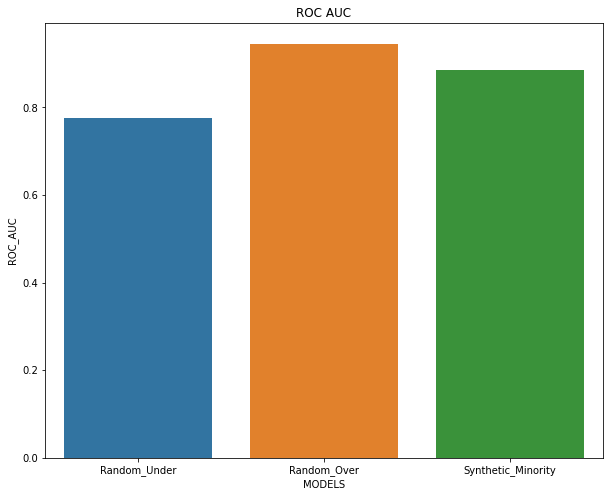

In [483]:
#plotting for r-squared error
sns.barplot(x ='MODELS',y='ROC_AUC', data = df).set(title='ROC AUC')

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

The best Resampling technique using the ROC-AUC as an evaluation metric is the Random Oversampling technique which has a roc auc of 0.9451, followed by the Synthetic Minority Oversampling Technique which also has a good roc auc of 0.8842. Since the results of ROSE resampling technique are significantly better than the SMOTE technique, we will therefore use the ROSE in building our final model.

# 6. Hyperparameter Optimization with GridSearchCV

In [181]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, make_scorer

In [43]:
# using ROSE as a sampling technique
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=101)

In [474]:
#creating a dictionary of hyper parameters
param_grid = {
    "max_depth": [4, 5, 7],
    "learning_rate": [0.1, 0.01],
    "n_estimators":[3000, 5000],
}

In [475]:
model_xgboost = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                               colsample_bytree=0.5,
                                                               eval_metric='auc',
                                                               use_label_encoder=False),
                               param_grid= param_grid,
                               cv=3,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=4)
model_xgboost.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=3000;, score=(train=0.911, test=0.878) total time= 2.5min
[CV 2/3] END learning_rate=0.1, max_depth=4, n_estimators=3000;, score=(train=0.910, test=0.880) total time= 2.5min
[CV 3/3] END learning_rate=0.1, max_depth=4, n_estimators=3000;, score=(train=0.911, test=0.878) total time= 2.5min
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=5000;, score=(train=0.947, test=0.909) total time= 4.2min
[CV 2/3] END learning_rate=0.1, max_depth=4, n_estimators=5000;, score=(train=0.946, test=0.909) total time= 4.2min
[CV 3/3] END learning_rate=0.1, max_depth=4, n_estimators=5000;, score=(train=0.947, test=0.908) total time= 4.2min
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.958, test=0.919) total time= 3.0min
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.958, test=0.919) total time= 3.0min
[CV 3/3] EN

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [4, 5, 7],
                         'n_estimators': [3000, 5000]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [476]:
model_xgboost.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 5000}

In [477]:
model_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [478]:
print("Best Accuracy score of the GridSearchCV ::",model_xgboost.best_score_)

Best Accuracy score of the GridSearchCV :: 0.9640085262116836


We use a GridSearchCV for hyperparameter tuning. It provide us with determining the best parameters to be used in building our final model. We use the method best_params_ to get the best parameters to be in the final model. Also, the best_score_ method is used to check the best score based on scoring metric i.e accuracy or F1.

After running the GridSearchCV, the best_score i.e accuracy score our model is **0.9640**.

# 7. Final Model with above parameters

In [182]:
# using ROSE as a sampling technique
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=101)

In [183]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
                                    monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

eval_set = [(X_test, y_test)]

final_model.fit(X_train, 
                 y_train,
                early_stopping_rounds=10,
                eval_set=eval_set,
                verbose=True)


C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80497
[1]	validation_0-auc:0.84492
[2]	validation_0-auc:0.85658
[3]	validation_0-auc:0.85403
[4]	validation_0-auc:0.86216
[5]	validation_0-auc:0.86272
[6]	validation_0-auc:0.86416
[7]	validation_0-auc:0.86497
[8]	validation_0-auc:0.86584
[9]	validation_0-auc:0.86639
[10]	validation_0-auc:0.86670
[11]	validation_0-auc:0.86799
[12]	validation_0-auc:0.86847
[13]	validation_0-auc:0.86885
[14]	validation_0-auc:0.86917
[15]	validation_0-auc:0.86985
[16]	validation_0-auc:0.87019
[17]	validation_0-auc:0.87046
[18]	validation_0-auc:0.87117
[19]	validation_0-auc:0.87145
[20]	validation_0-auc:0.87171
[21]	validation_0-auc:0.87241
[22]	validation_0-auc:0.87280
[23]	validation_0-auc:0.87327
[24]	validation_0-auc:0.87377
[25]	validation_0-auc:0.87459
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87550
[28]	validation_0-auc:0.87577
[29]	validation_0-auc:0.87610
[30]	validation_0-auc:0.87663
[31]	validation_0-auc:0.87698
[32]	validation_0-auc:0.87732
[33]	validation_0-au

[268]	validation_0-auc:0.91721
[269]	validation_0-auc:0.91723
[270]	validation_0-auc:0.91730
[271]	validation_0-auc:0.91733
[272]	validation_0-auc:0.91745
[273]	validation_0-auc:0.91746
[274]	validation_0-auc:0.91777
[275]	validation_0-auc:0.91809
[276]	validation_0-auc:0.91835
[277]	validation_0-auc:0.91859
[278]	validation_0-auc:0.91861
[279]	validation_0-auc:0.91863
[280]	validation_0-auc:0.91888
[281]	validation_0-auc:0.91898
[282]	validation_0-auc:0.91924
[283]	validation_0-auc:0.91931
[284]	validation_0-auc:0.91933
[285]	validation_0-auc:0.91948
[286]	validation_0-auc:0.91954
[287]	validation_0-auc:0.91973
[288]	validation_0-auc:0.91972
[289]	validation_0-auc:0.91993
[290]	validation_0-auc:0.92004
[291]	validation_0-auc:0.92016
[292]	validation_0-auc:0.92024
[293]	validation_0-auc:0.92053
[294]	validation_0-auc:0.92065
[295]	validation_0-auc:0.92069
[296]	validation_0-auc:0.92071
[297]	validation_0-auc:0.92095
[298]	validation_0-auc:0.92096
[299]	validation_0-auc:0.92100
[300]	va

[533]	validation_0-auc:0.94358
[534]	validation_0-auc:0.94365
[535]	validation_0-auc:0.94368
[536]	validation_0-auc:0.94369
[537]	validation_0-auc:0.94375
[538]	validation_0-auc:0.94376
[539]	validation_0-auc:0.94382
[540]	validation_0-auc:0.94382
[541]	validation_0-auc:0.94397
[542]	validation_0-auc:0.94408
[543]	validation_0-auc:0.94423
[544]	validation_0-auc:0.94425
[545]	validation_0-auc:0.94427
[546]	validation_0-auc:0.94435
[547]	validation_0-auc:0.94445
[548]	validation_0-auc:0.94453
[549]	validation_0-auc:0.94463
[550]	validation_0-auc:0.94465
[551]	validation_0-auc:0.94468
[552]	validation_0-auc:0.94472
[553]	validation_0-auc:0.94472
[554]	validation_0-auc:0.94474
[555]	validation_0-auc:0.94494
[556]	validation_0-auc:0.94509
[557]	validation_0-auc:0.94513
[558]	validation_0-auc:0.94521
[559]	validation_0-auc:0.94535
[560]	validation_0-auc:0.94546
[561]	validation_0-auc:0.94552
[562]	validation_0-auc:0.94561
[563]	validation_0-auc:0.94567
[564]	validation_0-auc:0.94567
[565]	va

[798]	validation_0-auc:0.95821
[799]	validation_0-auc:0.95831
[800]	validation_0-auc:0.95838
[801]	validation_0-auc:0.95839
[802]	validation_0-auc:0.95848
[803]	validation_0-auc:0.95852
[804]	validation_0-auc:0.95854
[805]	validation_0-auc:0.95856
[806]	validation_0-auc:0.95860
[807]	validation_0-auc:0.95867
[808]	validation_0-auc:0.95873
[809]	validation_0-auc:0.95879
[810]	validation_0-auc:0.95887
[811]	validation_0-auc:0.95889
[812]	validation_0-auc:0.95889
[813]	validation_0-auc:0.95890
[814]	validation_0-auc:0.95892
[815]	validation_0-auc:0.95897
[816]	validation_0-auc:0.95903
[817]	validation_0-auc:0.95920
[818]	validation_0-auc:0.95925
[819]	validation_0-auc:0.95932
[820]	validation_0-auc:0.95932
[821]	validation_0-auc:0.95941
[822]	validation_0-auc:0.95944
[823]	validation_0-auc:0.95947
[824]	validation_0-auc:0.95951
[825]	validation_0-auc:0.95958
[826]	validation_0-auc:0.95961
[827]	validation_0-auc:0.95964
[828]	validation_0-auc:0.95969
[829]	validation_0-auc:0.95978
[830]	va

[1061]	validation_0-auc:0.96803
[1062]	validation_0-auc:0.96805
[1063]	validation_0-auc:0.96805
[1064]	validation_0-auc:0.96816
[1065]	validation_0-auc:0.96817
[1066]	validation_0-auc:0.96822
[1067]	validation_0-auc:0.96824
[1068]	validation_0-auc:0.96826
[1069]	validation_0-auc:0.96829
[1070]	validation_0-auc:0.96832
[1071]	validation_0-auc:0.96834
[1072]	validation_0-auc:0.96835
[1073]	validation_0-auc:0.96838
[1074]	validation_0-auc:0.96838
[1075]	validation_0-auc:0.96839
[1076]	validation_0-auc:0.96839
[1077]	validation_0-auc:0.96846
[1078]	validation_0-auc:0.96846
[1079]	validation_0-auc:0.96848
[1080]	validation_0-auc:0.96852
[1081]	validation_0-auc:0.96854
[1082]	validation_0-auc:0.96854
[1083]	validation_0-auc:0.96857
[1084]	validation_0-auc:0.96858
[1085]	validation_0-auc:0.96862
[1086]	validation_0-auc:0.96864
[1087]	validation_0-auc:0.96865
[1088]	validation_0-auc:0.96866
[1089]	validation_0-auc:0.96872
[1090]	validation_0-auc:0.96873
[1091]	validation_0-auc:0.96873
[1092]	v

[1318]	validation_0-auc:0.97410
[1319]	validation_0-auc:0.97411
[1320]	validation_0-auc:0.97417
[1321]	validation_0-auc:0.97419
[1322]	validation_0-auc:0.97423
[1323]	validation_0-auc:0.97429
[1324]	validation_0-auc:0.97432
[1325]	validation_0-auc:0.97435
[1326]	validation_0-auc:0.97435
[1327]	validation_0-auc:0.97437
[1328]	validation_0-auc:0.97437
[1329]	validation_0-auc:0.97437
[1330]	validation_0-auc:0.97437
[1331]	validation_0-auc:0.97440
[1332]	validation_0-auc:0.97441
[1333]	validation_0-auc:0.97442
[1334]	validation_0-auc:0.97444
[1335]	validation_0-auc:0.97448
[1336]	validation_0-auc:0.97449
[1337]	validation_0-auc:0.97451
[1338]	validation_0-auc:0.97451
[1339]	validation_0-auc:0.97452
[1340]	validation_0-auc:0.97455
[1341]	validation_0-auc:0.97459
[1342]	validation_0-auc:0.97459
[1343]	validation_0-auc:0.97459
[1344]	validation_0-auc:0.97459
[1345]	validation_0-auc:0.97461
[1346]	validation_0-auc:0.97465
[1347]	validation_0-auc:0.97467
[1348]	validation_0-auc:0.97471
[1349]	v

[1575]	validation_0-auc:0.97835
[1576]	validation_0-auc:0.97837
[1577]	validation_0-auc:0.97840
[1578]	validation_0-auc:0.97842
[1579]	validation_0-auc:0.97843
[1580]	validation_0-auc:0.97844
[1581]	validation_0-auc:0.97848
[1582]	validation_0-auc:0.97849
[1583]	validation_0-auc:0.97850
[1584]	validation_0-auc:0.97853
[1585]	validation_0-auc:0.97853
[1586]	validation_0-auc:0.97853
[1587]	validation_0-auc:0.97853
[1588]	validation_0-auc:0.97854
[1589]	validation_0-auc:0.97856
[1590]	validation_0-auc:0.97859
[1591]	validation_0-auc:0.97859
[1592]	validation_0-auc:0.97858
[1593]	validation_0-auc:0.97860
[1594]	validation_0-auc:0.97861
[1595]	validation_0-auc:0.97861
[1596]	validation_0-auc:0.97863
[1597]	validation_0-auc:0.97864
[1598]	validation_0-auc:0.97869
[1599]	validation_0-auc:0.97868
[1600]	validation_0-auc:0.97868
[1601]	validation_0-auc:0.97870
[1602]	validation_0-auc:0.97872
[1603]	validation_0-auc:0.97875
[1604]	validation_0-auc:0.97876
[1605]	validation_0-auc:0.97877
[1606]	v

[1832]	validation_0-auc:0.98164
[1833]	validation_0-auc:0.98164
[1834]	validation_0-auc:0.98165
[1835]	validation_0-auc:0.98167
[1836]	validation_0-auc:0.98167
[1837]	validation_0-auc:0.98168
[1838]	validation_0-auc:0.98169
[1839]	validation_0-auc:0.98172
[1840]	validation_0-auc:0.98173
[1841]	validation_0-auc:0.98174
[1842]	validation_0-auc:0.98175
[1843]	validation_0-auc:0.98176
[1844]	validation_0-auc:0.98177
[1845]	validation_0-auc:0.98177
[1846]	validation_0-auc:0.98177
[1847]	validation_0-auc:0.98180
[1848]	validation_0-auc:0.98180
[1849]	validation_0-auc:0.98182
[1850]	validation_0-auc:0.98185
[1851]	validation_0-auc:0.98187
[1852]	validation_0-auc:0.98189
[1853]	validation_0-auc:0.98190
[1854]	validation_0-auc:0.98190
[1855]	validation_0-auc:0.98191
[1856]	validation_0-auc:0.98192
[1857]	validation_0-auc:0.98193
[1858]	validation_0-auc:0.98194
[1859]	validation_0-auc:0.98196
[1860]	validation_0-auc:0.98197
[1861]	validation_0-auc:0.98198
[1862]	validation_0-auc:0.98200
[1863]	v

[2089]	validation_0-auc:0.98433
[2090]	validation_0-auc:0.98433
[2091]	validation_0-auc:0.98433
[2092]	validation_0-auc:0.98432
[2093]	validation_0-auc:0.98433
[2094]	validation_0-auc:0.98433
[2095]	validation_0-auc:0.98433
[2096]	validation_0-auc:0.98435
[2097]	validation_0-auc:0.98435
[2098]	validation_0-auc:0.98436
[2099]	validation_0-auc:0.98437
[2100]	validation_0-auc:0.98437
[2101]	validation_0-auc:0.98439
[2102]	validation_0-auc:0.98439
[2103]	validation_0-auc:0.98440
[2104]	validation_0-auc:0.98440
[2105]	validation_0-auc:0.98442
[2106]	validation_0-auc:0.98442
[2107]	validation_0-auc:0.98442
[2108]	validation_0-auc:0.98442
[2109]	validation_0-auc:0.98443
[2110]	validation_0-auc:0.98444
[2111]	validation_0-auc:0.98444
[2112]	validation_0-auc:0.98445
[2113]	validation_0-auc:0.98447
[2114]	validation_0-auc:0.98447
[2115]	validation_0-auc:0.98449
[2116]	validation_0-auc:0.98449
[2117]	validation_0-auc:0.98449
[2118]	validation_0-auc:0.98449
[2119]	validation_0-auc:0.98450
[2120]	v

[2346]	validation_0-auc:0.98620
[2347]	validation_0-auc:0.98621
[2348]	validation_0-auc:0.98622
[2349]	validation_0-auc:0.98623
[2350]	validation_0-auc:0.98623
[2351]	validation_0-auc:0.98625
[2352]	validation_0-auc:0.98625
[2353]	validation_0-auc:0.98625
[2354]	validation_0-auc:0.98627
[2355]	validation_0-auc:0.98627
[2356]	validation_0-auc:0.98628
[2357]	validation_0-auc:0.98628
[2358]	validation_0-auc:0.98628
[2359]	validation_0-auc:0.98628
[2360]	validation_0-auc:0.98628
[2361]	validation_0-auc:0.98629
[2362]	validation_0-auc:0.98630
[2363]	validation_0-auc:0.98630
[2364]	validation_0-auc:0.98631
[2365]	validation_0-auc:0.98632
[2366]	validation_0-auc:0.98632
[2367]	validation_0-auc:0.98635
[2368]	validation_0-auc:0.98635
[2369]	validation_0-auc:0.98636
[2370]	validation_0-auc:0.98637
[2371]	validation_0-auc:0.98637
[2372]	validation_0-auc:0.98637
[2373]	validation_0-auc:0.98638
[2374]	validation_0-auc:0.98640
[2375]	validation_0-auc:0.98641
[2376]	validation_0-auc:0.98642
[2377]	v

[2603]	validation_0-auc:0.98793
[2604]	validation_0-auc:0.98793
[2605]	validation_0-auc:0.98794
[2606]	validation_0-auc:0.98794
[2607]	validation_0-auc:0.98794
[2608]	validation_0-auc:0.98796
[2609]	validation_0-auc:0.98797
[2610]	validation_0-auc:0.98798
[2611]	validation_0-auc:0.98799
[2612]	validation_0-auc:0.98799
[2613]	validation_0-auc:0.98799
[2614]	validation_0-auc:0.98800
[2615]	validation_0-auc:0.98800
[2616]	validation_0-auc:0.98800
[2617]	validation_0-auc:0.98801
[2618]	validation_0-auc:0.98801
[2619]	validation_0-auc:0.98802
[2620]	validation_0-auc:0.98803
[2621]	validation_0-auc:0.98803
[2622]	validation_0-auc:0.98804
[2623]	validation_0-auc:0.98804
[2624]	validation_0-auc:0.98804
[2625]	validation_0-auc:0.98806
[2626]	validation_0-auc:0.98807
[2627]	validation_0-auc:0.98808
[2628]	validation_0-auc:0.98808
[2629]	validation_0-auc:0.98808
[2630]	validation_0-auc:0.98810
[2631]	validation_0-auc:0.98810
[2632]	validation_0-auc:0.98810
[2633]	validation_0-auc:0.98810
[2634]	v

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [437]:
print("Best Accuracy score of the Final Model ::",round(final_model.best_score,4))

Best Accuracy score of the Final Model :: 0.9892


We can note that the accuracy score of the model improved from 0.9644 to 0.9892 after we applied the GridSearchCV best parameters.

In [185]:
final_predictions = final_model.predict(X_test)

In [186]:
final_predictions 

array([1, 1, 1, ..., 0, 0, 1])

In [187]:
# accuracy on test data
print("Accuracy of Model::",accuracy_score(y_test,final_predictions))

Accuracy of Model:: 0.9621337545756945


In [188]:
roc_auc_score(y_test,final_predictions)

0.96222512684118

In [189]:
confusion_matrix(y_test, final_predictions)

array([[30703,  2309],
       [  184, 32641]], dtype=int64)

In [190]:
tn, fp, fn, tp = confusion_matrix(y_test, final_predictions).ravel()

In [191]:
(tn, fp, fn, tp)

(30703, 2309, 184, 32641)

In [192]:
target_names = ['Deliquency NO', 'Deliquency YES']
print(classification_report(y_test, final_predictions, target_names=target_names))

                precision    recall  f1-score   support

 Deliquency NO       0.99      0.93      0.96     33012
Deliquency YES       0.93      0.99      0.96     32825

      accuracy                           0.96     65837
     macro avg       0.96      0.96      0.96     65837
  weighted avg       0.96      0.96      0.96     65837



We note our dataset provides best estimates for our precision, recall and F1-score.

# 8. Finally, make predictions on the New Dataset

In [263]:
# predictions
test_predictions = final_model.predict(test_data)

# probability predictions
test_predictions_proba = final_model.predict_proba(test_data)

In [264]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [265]:
test_predictions_proba

array([[0.874525  , 0.125475  ],
       [0.93982965, 0.06017033],
       [0.8845837 , 0.1154163 ],
       ...,
       [0.99746263, 0.00253735],
       [0.98409253, 0.01590747],
       [0.947574  , 0.052426  ]], dtype=float32)

In [266]:
# create a dataframe of the test predictions results
test_predict = pd.DataFrame(test_predictions)
test_predict = test_predict[0]

# create a dataframe of probability predictions
probability_pred = pd.DataFrame(test_predictions_proba)

In [269]:
# probability predictions as a dataframe
probability_pred

,0,1
0,0.874525,0.125475
1,0.939830,0.060170
2,0.884584,0.115416
3,0.940370,0.059630
4,0.593670,0.406330
...,...,...
101498,0.814239,0.185761
101499,0.190170,0.809830
101500,0.997463,0.002537
101501,0.984093,0.015907


## Compare with solutions for accuracy of the model

In [270]:
df = pd.read_csv("sampleEntry.csv")
df.drop('Id', axis=1, inplace=True)
df = df['Probability']

In [391]:
# test probability Actual results 
solutions = []
for i in df:
    if i < 0.19:
        solutions.append(0)
    else:
        solutions.append(1)

For the Actual results, we assume that a probability below 0.19 will classify the deliquency as ZERO (No deliquency) whereas the probability above 0.19 will provide a deliquency of ONE (Showing presense of deliquency).

In [386]:
print("Accuracy of Model::",accuracy_score(solutions,test_predictions))

Accuracy of Model:: 0.9242485443779986


In [387]:
roc_auc_score(solutions,test_predictions)

0.8313017351125794

In [392]:
print(classification_report(solutions,test_predictions, target_names=target_names))

                precision    recall  f1-score   support

 Deliquency NO       0.97      0.95      0.96     91869
Deliquency YES       0.58      0.70      0.64      9634

      accuracy                           0.92    101503
     macro avg       0.77      0.83      0.80    101503
  weighted avg       0.93      0.92      0.93    101503



In [394]:
confusion_matrix(solutions,test_predictions)

array([[86955,  4914],
       [ 2845,  6789]], dtype=int64)

In [395]:
tn, fp, fn, tp = confusion_matrix(solutions,test_predictions).ravel()

In [396]:
(tn, fp, fn, tp)

(86955, 4914, 2845, 6789)

## Conclusion

The paramount importance in our ML model is to build a model that is able to detect users that have a deliquency in the past 2 years. The evaluation metric that we will focus on in our classification model is the **RECALL**. Recall (sensitivity) measures the proportion of Actual Positive labels correctly identified in the model. It is calculated by the  total number of True Positive divided by the Total number of Positive & Negative Predictions. We use this metric because it helps when the cost of False Negative is High i.e when the type 2 error is important. 

The ultimate goal is to minimise our False Negative predictions, A test result which wrongly indicates that a particular condition or attribute is absent. Minimising the FN reduces the predictions that there is No Deliquncy when infact the user has a deliquency.

The results from the confusion matrix show that only 2 845 were classified as False Negative and 6 789 were classified as True Positive. The classification report shows that the Deliquency of YES has a **RECALL** of 0.70 and F1 score of 0.64.

Also, the Accuracy of our model on test data is 0.9242 whereas ROC AUC score is 0.8313. This shows that the model does not result in overfitting where it perfoms well on train data but under performs on unseen data (test data). In this case, the model performs well both on train and test data.